<a href="https://colab.research.google.com/github/filladani/PCVK_2024/blob/main/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Praktikum

### no 1

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


### no 2

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import glob

### no 3

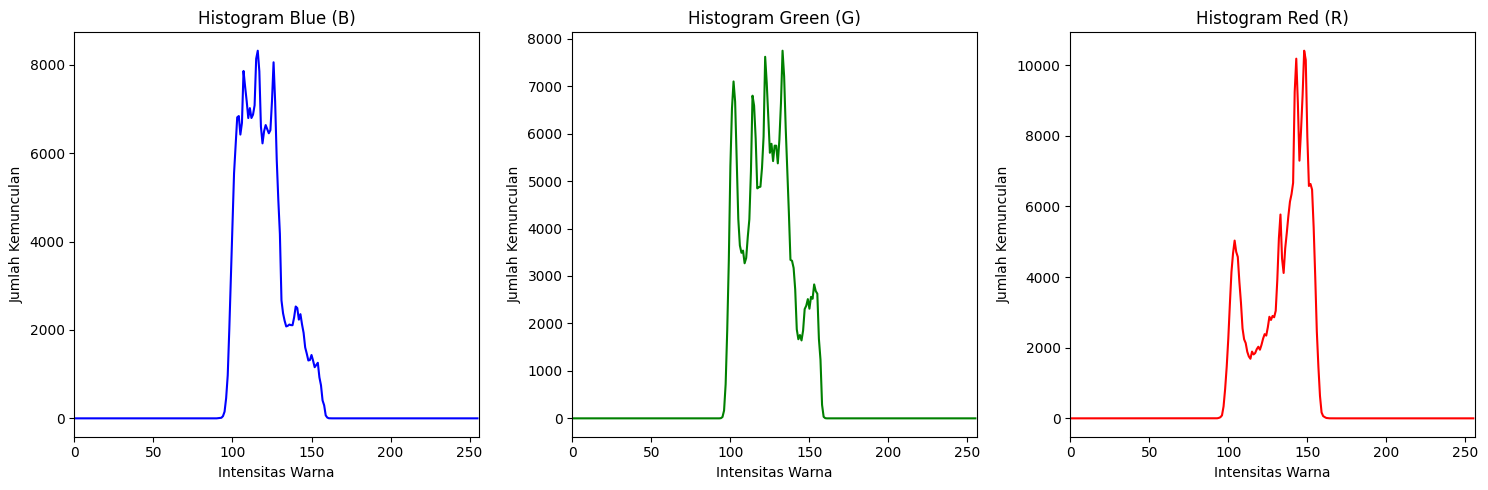

In [3]:
# Import library yang diperlukan
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Start
# 2. Input image
# Fungsi untuk membaca citra menggunakan OpenCV
image_path = '/content/drive/MyDrive/PCVK/images/lena_lc.jpg'  # Ganti dengan path citra yang ingin dianalisis
image = cv2.imread(image_path)

# 3. Menghitung jumlah kemunculan setiap pixel warna pada seluruh pixel citra
# Split gambar menjadi 3 channel (B, G, R)
channels = cv2.split(image)

# Menghitung histogram untuk setiap channel warna (B, G, R)
b_hist = cv2.calcHist([channels[0]], [0], None, [256], [0, 256])  # Channel Biru (B)
g_hist = cv2.calcHist([channels[1]], [0], None, [256], [0, 256])  # Channel Hijau (G)
r_hist = cv2.calcHist([channels[2]], [0], None, [256], [0, 256])  # Channel Merah (R)

# Membuat plot untuk masing-masing channel
plt.figure(figsize=(15, 5))

# Plot histogram untuk channel Biru (B)
plt.subplot(1, 3, 1)
plt.plot(b_hist, color='b')
plt.title('Histogram Blue (B)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim([0, 256])

# Plot histogram untuk channel Hijau (G)
plt.subplot(1, 3, 2)
plt.plot(g_hist, color='g')
plt.title('Histogram Green (G)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim([0, 256])

# Plot histogram untuk channel Merah (R)
plt.subplot(1, 3, 3)
plt.plot(r_hist, color='r')
plt.title('Histogram Red (R)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim([0, 256])

# 4. Menampilkan histogram citra
plt.tight_layout()
plt.show()

# 5. End

### no 4

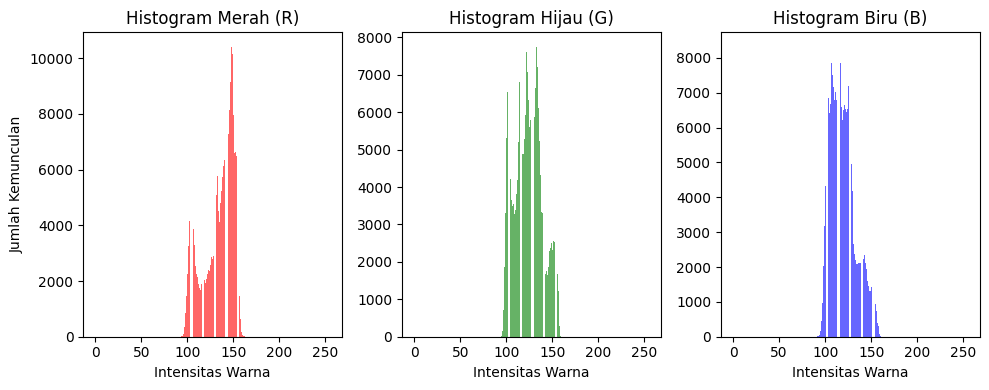

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Input image
image_path = '/content/drive/MyDrive/PCVK/images/lena_lc.jpg'  # Ganti dengan path citra yang ingin dianalisis
img = cv2.imread(image_path)

# Menghitung histogram untuk setiap channel (R, G, B) menggunakan NumPy
hist_r, bins_r = np.histogram(img[:, :, 2], bins=256, range=(0, 256))  # Channel Merah (R)
hist_g, bins_g = np.histogram(img[:, :, 1], bins=256, range=(0, 256))  # Channel Hijau (G)
hist_b, bins_b = np.histogram(img[:, :, 0], bins=256, range=(0, 256))  # Channel Biru (B)

# Membuat plot untuk masing-masing histogram channel
plt.figure(figsize=(10, 4))

# Plot histogram channel merah
plt.subplot(131)
plt.bar(range(len(hist_r)), hist_r, color='red', alpha=0.6)
plt.title('Histogram Merah (R)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

# Plot histogram channel hijau
plt.subplot(132)
plt.bar(range(len(hist_g)), hist_g, color='green', alpha=0.6)
plt.title('Histogram Hijau (G)')
plt.xlabel('Intensitas Warna')

# Plot histogram channel biru
plt.subplot(133)
plt.bar(range(len(hist_b)), hist_b, color='blue', alpha=0.6)
plt.title('Histogram Biru (B)')
plt.xlabel('Intensitas Warna')

# Menampilkan histogram citra
plt.tight_layout()
plt.show()

### no 5

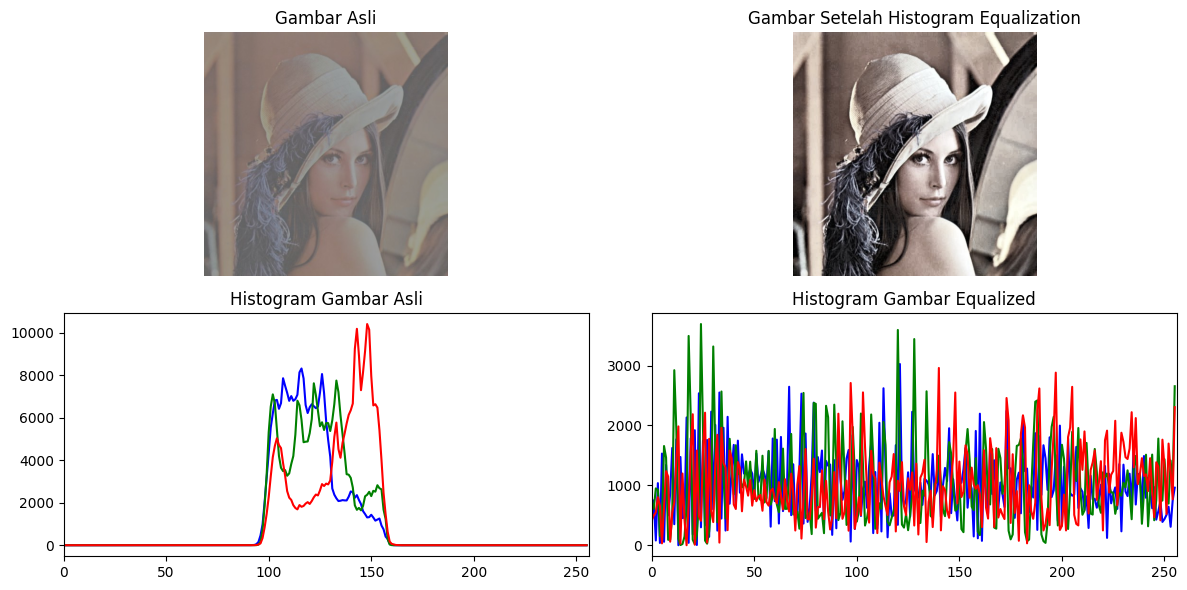

In [9]:
# Import library yang diperlukan
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Start
# 2. Input image
# Fungsi untuk membaca citra menggunakan OpenCV
image_path = '/content/drive/MyDrive/PCVK/images/lena_lc.jpg'  # Ganti dengan path citra yang ingin dianalisis
image = cv2.imread(image_path)

# Convert image to YCrCb color space untuk histogram equalization pada channel Y (brightness)
image_ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

# Split gambar menjadi 3 channel (Y, Cr, Cb)
y_channel, cr_channel, cb_channel = cv2.split(image_ycrcb)

# 3. Apply histogram equalization pada channel Y
y_eq = cv2.equalizeHist(y_channel)

# Merge kembali channel yang telah di-equalize dengan Cr dan Cb
image_ycrcb_eq = cv2.merge([y_eq, cr_channel, cb_channel])

# Convert kembali ke format BGR dari YCrCb
image_equalized = cv2.cvtColor(image_ycrcb_eq, cv2.COLOR_YCrCb2BGR)

# 4. Plot gambar sebelum dan sesudah histogram equalization
plt.figure(figsize=(12, 6))

# Tampilkan gambar asli
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR ke RGB untuk ditampilkan di matplotlib
plt.title('Gambar Asli')
plt.axis('off')

# Tampilkan gambar setelah histogram equalization
plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(image_equalized, cv2.COLOR_BGR2RGB))  # Convert BGR ke RGB
plt.title('Gambar Setelah Histogram Equalization')
plt.axis('off')

# 5. Membuat histogram gambar asli
colors = ('b', 'g', 'r')
plt.subplot(2, 2, 3)
for i, color in enumerate(colors):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
plt.title('Histogram Gambar Asli')
plt.xlim([0, 256])

# 6. Membuat histogram gambar setelah equalization
plt.subplot(2, 2, 4)
for i, color in enumerate(colors):
    hist = cv2.calcHist([image_equalized], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
plt.title('Histogram Gambar Equalized')
plt.xlim([0, 256])

# 7. Menampilkan seluruh plot
plt.tight_layout()
plt.show()

# 8. End